# A more complex example combing different graphics, gridplot and multiple perspectives

In [1]:
import numpy as np
from fastplotlib.layouts import GridPlot
from fastplotlib.graphics import LineGraphic, ScatterGraphic

RFBOutputContext()

/home/kushal/Insync/kushalkolar@gmail.com/drive/repos/fastplotlib/fastplotlib/layouts/_subplot.py:134: UserWarning: `center_graphic()` not yet implemented for `PerspectiveCamera`
  warn("`center_graphic()` not yet implemented for `PerspectiveCamera`")
/home/kushal/Insync/kushalkolar@gmail.com/drive/repos/fastplotlib/fastplotlib/layouts/_subplot.py:148: UserWarning: `center_scene()` not yet implemented for `PerspectiveCamera`
  warn("`center_scene()` not yet implemented for `PerspectiveCamera`")



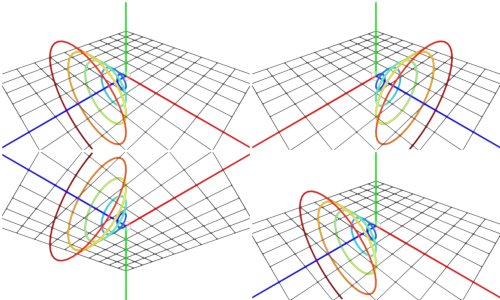

JupyterWgpuCanvas()

In [2]:
# grid with 2 rows and 2 columns
shape = (2, 2)

# pan-zoom controllers for each view
# views are synced if they have the 
# same controller ID
# in this example the first view has its own controller
# and the last 3 views are synced
controllers = [
    [0, 1], # id each controller with an integer
    [1, 1]
]

# create the grid plot
grid_plot = GridPlot(
    shape=shape,
    cameras='3d',  # 3D view for all subplots within the grid
    controllers=controllers
)


# create data in the shape of a spiral
phi = np.linspace(0, 30, 200)

xs = phi * np.cos(phi)
ys = phi * np.sin(phi)
zs = phi

# make data 3d, with shape [<n_vertices>, 3]
spiral = np.dstack([xs, ys, zs])[0]

# we will use a "ball" marker for each subplot
# this ball will move along the spiral
markers = list()
for i, subplot in enumerate(grid_plot):
    # create and add the LineGraphic
    line = LineGraphic(data=spiral, size=2, cmap='jet')
    subplot.add_graphic(line)
    
    # make axes visible
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)
    
    # invert the camera for some subplots to get
    # different perspectives on the same data
    if i == 1:
        subplot.camera.scale.x = -1
    if i == 2:
        subplot.camera.scale.y = -1
    
    # just a ball that can move on the spiral
    marker = ScatterGraphic(data=spiral[0], size=10)
    subplot.add_graphic(marker)
    markers.append(marker)
    
marker_index = 0

# a function to move the ball along the spiral
def move_marker():
    global marker_index
    global markers
    
    marker_index += 1
    
    if marker_index == spiral.shape[0]:
        marker_index = 0
    
    new_markers = list()
    for subplot, marker in zip(grid_plot, markers):
        subplot.remove_graphic(marker)
        new_marker = ScatterGraphic(data=spiral[marker_index], size=15)
        new_markers.append(new_marker)
        subplot.add_graphic(new_marker)
        
    markers = new_markers

# add `move_marker` to the animations
grid_plot.add_animations(move_marker)

grid_plot.show()